# Numerical Weather Prediction Exploratory Data Analysis
This repo is a starting point for exploring the Numerical Weather Prediction (NWP) data. You must have the setup (outlined in the README) completed before running this notebook.

## Getting the data
To explore the data, you first need to download it locally. For the NWP data, there is surface and atmosphere data. For initial experiments we will be using only one day of data from each of the surface and atmosphere data. Currently there is a couple of years worth of data, OCF is adding more every day. Download the following data:
- Atmosphere: 1st of January. [link](https://huggingface.co/datasets/openclimatefix/era5-reanalysis/blob/main/data/atmosphere/2022/01/20220101.zarr.zip).
- Surface: 1st of January. [link](https://huggingface.co/datasets/openclimatefix/era5-reanalysis/blob/main/data/surface/2022/01/20220101.zarr.zip).

**It is important that you read the "Note on version control for data" section of the README linked [here](https://github.com/WAT-ai/open-climate-fix-project/blob/main/README.md#note-on-version-control-for-data).**


## Unzipping the data
The data files are in zarr format, and they also come zipped. First you must unzip the files. You can use the [unzip.py](https://github.com/WAT-ai/open-climate-fix-project/blob/2c2b70e42a78a051050ff331eee56a5dd7f3c1f0/utils/unzip.py) script, or you can unzip your files using whatever method you like. Just make sure to save the data in the `data/` folder in your working directory. The steps to using the unzip.py script are linked [here](https://github.com/WAT-ai/open-climate-fix-project/blob/main/README.md#utilsunzippy).

Ideally we could inspect data over the year to see how seasons affect the NWP data, but the data is simply so large that it is difficult to work with multiple days of data at once.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import datetime
from scipy import stats

In [2]:
DATA_PATH = '../data/nwp/atmosphere_data.zarr'
# here is an example: 'C:/Users/areel/watai/watai_repo/data/nwp/atmosphere/2022/01'

In [3]:
dataset = xr.open_dataset(DATA_PATH, engine='zarr', chunks='auto')

C:\Users\Bill\anaconda3\envs\watai\lib\site-packages\xarray\core\dataset.py:248: UserWarning: The specified Dask chunks separate the stored chunks along dimension "level" starting at index 34. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
C:\Users\Bill\anaconda3\envs\watai\lib\site-packages\xarray\core\dataset.py:248: UserWarning: The specified Dask chunks separate the stored chunks along dimension "latitude" starting at index 701. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
C:\Users\Bill\anaconda3\envs\watai\lib\site-packages\xarray\core\dataset.py:248: UserWarning: The specified Dask chunks separate the stored chunks along dimension "longitude" starting at index 1404. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


Lets get a general look at the data first. It is indexed by four coordinates - Time (datetime/hours), Latitude (degrees north), Longitude (degrees east), and Atmospheric Pressure Level (millibars).

In [4]:
dataset

<xarray.Dataset>
Dimensions:    (time: 24, level: 37, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-01T23:00:00
Data variables: (12/16)
    cc         (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    ciwc       (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    clwc       (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    crwc       (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    cswc       (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    d          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    ...         ...
    t          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    u          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    vo         (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    w          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
    z          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 701, 1404), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-09 15:27:59 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
dataset.coords

Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-01T23:00:00

In [6]:
dataset.dims

Frozen({'time': 24, 'level': 37, 'latitude': 721, 'longitude': 1440})

In [7]:
dataset.indexes

Indexes:
    latitude   Float64Index([  90.0,  89.75,   89.5,  89.25,   89.0,  88.75,   88.5,  88.25,
                88.0,  87.75,
              ...
              -87.75,  -88.0, -88.25,  -88.5, -88.75,  -89.0, -89.25,  -89.5,
              -89.75,  -90.0],
             dtype='float64', name='latitude', length=721)
    level      Int64Index([   1,    2,    3,    5,    7,   10,   20,   30,   50,   70,  100,
             125,  150,  175,  200,  225,  250,  300,  350,  400,  450,  500,
             550,  600,  650,  700,  750,  775,  800,  825,  850,  875,  900,
             925,  950,  975, 1000],
           dtype='int64', name='level')
    longitude  Float64Index([   0.0,   0.25,    0.5,   0.75,    1.0,   1.25,    1.5,   1.75,
                 2.0,   2.25,
              ...
               357.5, 357.75,  358.0, 358.25,  358.5, 358.75,  359.0, 359.25,
               359.5, 359.75],
             dtype='float64', name='longitude', length=1440)
    time       DatetimeIndex(['2022-01-01 00:

In [8]:
time_idx = dataset.indexes['time']
len(time_idx)

24

Lets see what each of the variables are, as well as their descriptions.

In [13]:
starting_time = time_idx[0]
variables = ["level", "latitude", "longitude", "cc", "ciwc", "clwc", "crwc", "cswc", "d", "o3", "pv", "q", "r", "t", "u", "v", "vo", "w", "z"]
data = dataset.sel(time=starting_time)
for v in variables:
    print(f'Variable name: {v}, Description: {data[v].attrs["long_name"]}, Units: {data[v].attrs["units"]}')

Variable name: level, Description: pressure_level, Units: millibars
Variable name: latitude, Description: latitude, Units: degrees_north
Variable name: longitude, Description: longitude, Units: degrees_east
Variable name: cc, Description: Fraction of cloud cover, Units: (0 - 1)
Variable name: ciwc, Description: Specific cloud ice water content, Units: kg kg**-1
Variable name: clwc, Description: Specific cloud liquid water content, Units: kg kg**-1
Variable name: crwc, Description: Specific rain water content, Units: kg kg**-1
Variable name: cswc, Description: Specific snow water content, Units: kg kg**-1
Variable name: d, Description: Divergence, Units: s**-1
Variable name: o3, Description: Ozone mass mixing ratio, Units: kg kg**-1
Variable name: pv, Description: Potential vorticity, Units: K m**2 kg**-1 s**-1
Variable name: q, Description: Specific humidity, Units: kg kg**-1
Variable name: r, Description: Relative humidity, Units: %
Variable name: t, Description: Temperature, Units: K

Now, lets look at a specific point of data in the dataset, and what the values are like.

In [14]:
dataset.coords['level']

<xarray.DataArray 'level' (level: 37)>
array([   1,    2,    3,    5,    7,   10,   20,   30,   50,   70,  100,  125,
        150,  175,  200,  225,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000])
Coordinates:
  * level    (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
Attributes:
    long_name:  pressure_level
    units:      millibars

In [15]:
pt = dataset.sel(time=starting_time, latitude=90, longitude=1, level=1000)
for v in variables:
    print(f'{data[v].attrs["long_name"]}: {pt.get(v).values} ({data[v].attrs["units"]})')

pressure_level: 1000 (millibars)
latitude: 90.0 (degrees_north)
longitude: 1.0 (degrees_east)
Fraction of cloud cover: 0.1953061819076538 ((0 - 1))
Specific cloud ice water content: 5.408655852079391e-07 (kg kg**-1)
Specific cloud liquid water content: 0.0 (kg kg**-1)
Specific rain water content: 0.0 (kg kg**-1)
Specific snow water content: 4.656612873077393e-10 (kg kg**-1)
Divergence: 6.712436970701674e-06 (s**-1)
Ozone mass mixing ratio: 8.66366463014856e-08 (kg kg**-1)
Potential vorticity: 1.0384246706962585e-06 (K m**2 kg**-1 s**-1)
Specific humidity: 0.0004060184583067894 (kg kg**-1)
Relative humidity: 104.12722778320312 (%)
Temperature: 248.08685302734375 (K)
U component of wind: 0.0008697509765625 (m s**-1)
V component of wind: -0.0006442070007324219 (m s**-1)
Vorticity (relative): 9.004128514789045e-06 (s**-1)
Vertical velocity: 0.004671573638916016 (Pa s**-1)
Geopotential: 2035.625 (m**2 s**-2)


Lets get some statistics of the data now!

In [17]:
for v in variables:
    # uncomment if you prefer pandas' describe()
    # print(f'{v}:\n {pd.Series(dataset.variables[v].values.flatten()).describe()}\n')
    print(f'{v}: {stats.describe(dataset.variables[v].values.flatten())}')

level: DescribeResult(nobs=37, minmax=(1, 1000), mean=420.2162162162162, variance=127718.5075075075, skewness=0.24989350596551438, kurtosis=-1.4939474415541094)
latitude: DescribeResult(nobs=721, minmax=(-90.0, 90.0), mean=0.0, variance=2711.2604166666665, skewness=0.0, kurtosis=-1.200004399393293)
longitude: DescribeResult(nobs=1440, minmax=(0.0, 359.75), mean=179.875, variance=10807.499348505906, skewness=0.0, kurtosis=-1.2000010647093327)
cc: DescribeResult(nobs=921957120, minmax=(0.0, 1.0), mean=0.06352015, variance=0.03872675080327546, skewness=3.511764550106013, kurtosis=11.490484643117316)
ciwc: DescribeResult(nobs=921957120, minmax=(0.0, 0.0011816025), mean=1.4911359e-06, variance=9.064673327347914e-11, skewness=18.39594922765595, kurtosis=609.5432711916862)
clwc: DescribeResult(nobs=921957120, minmax=(0.0, 0.0014977455), mean=3.747364e-06, variance=4.873332298550664e-10, skewness=10.560808383085046, kurtosis=155.57936398659362)
crwc: DescribeResult(nobs=921957120, minmax=(0.0,

Lets check if there are any NaN values in the dataset:

As seen below, there are none!

In [30]:
for v in variables:
    print(f'{v}: {np.isnan(dataset.variables[v].values).any()}')

level: False
latitude: False
longitude: False
cc: False
ciwc: False
clwc: False
crwc: False
cswc: False
d: False
o3: False
pv: False
q: False
r: False
t: False
u: False
v: False
vo: False
w: False
z: False


Next, lets see how far the lat/long spans.

As seen below, the data spans the entire world. To reduce the size of the data, we can eliminate the data for the lat/long outside the region we are predicting for.

In [48]:
box = [(dataset.indexes['latitude'].min(), dataset.indexes['longitude'].min()),
       (dataset.indexes['latitude'].max(), dataset.indexes['longitude'].max())]

box

[(-90.0, 0.0), (90.0, 359.75)]

Now, lets try to get some visualizations out of the dataset!

The following function plots the average of a variable at a certain atmospheric level.

In [7]:
import matplotlib.pyplot as plt

# Reshape the array such that the prime meridian (longitude=0) is centered on the map
def center_at_prime_meridean(variable_data):
    for i in range(len(variable_data)):
        first_half = variable_data[i][:720]
        second_half = variable_data[i][720:]
        variable_data[i] = np.concatenate([second_half, first_half])
    return variable_data

def plot_variable_at_level(variable_name, level):
    variable_data = center_at_prime_meridean(dataset.sel(level=level)[variable_name].values.mean(axis=0))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    im = plt.imshow(variable_data, extent=[-180,180,-90,90])
    plt.colorbar(im, fraction=0.022, pad=0.01)

For example, we can see the general cloud coverage across the world at level=850millibars or level=100millibars. The images produced are accurate since it is expected that there is more cloud coverage at 850mb than 100mb (higher up in the atmosphere)

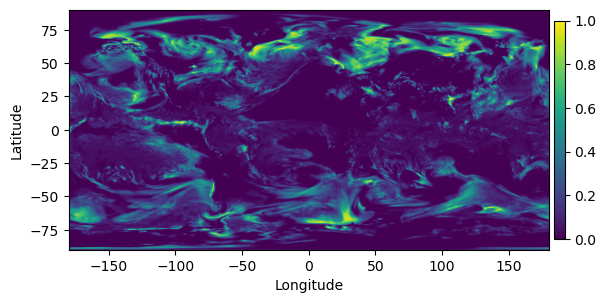

In [173]:
plot_variable_at_level('cc', 850)

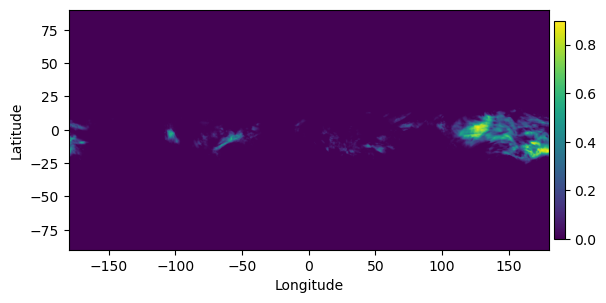

In [174]:
plot_variable_at_level('cc', 100)

Next, lets plot the temperatures. Once again, the images seem to make sense. It is awarmer near the equator and on the land (you can make out the shapes of south america, africa, and australia from the temperature!). Also, the temperatures are warmest and most distinct at ground level than higher up at 30mb.

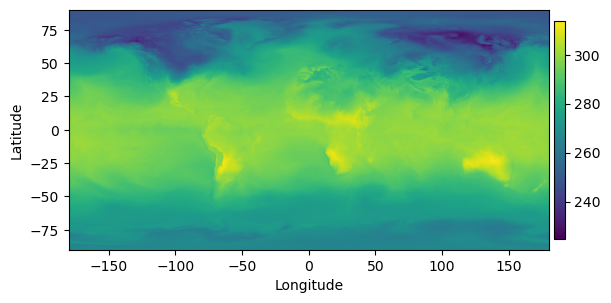

In [176]:
plot_variable_at_level('t', 1000)

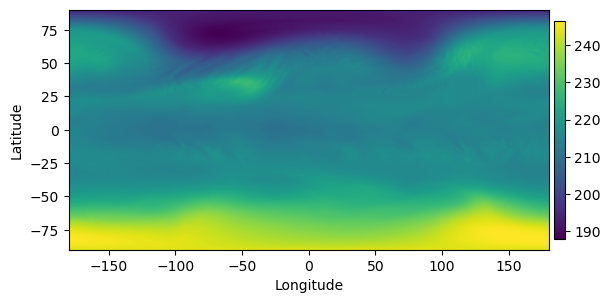

In [146]:
plot_variable_at_level('t', 30)

Lets visualize the potential vorticity variable. Feel free to visualize the different variables on your own!

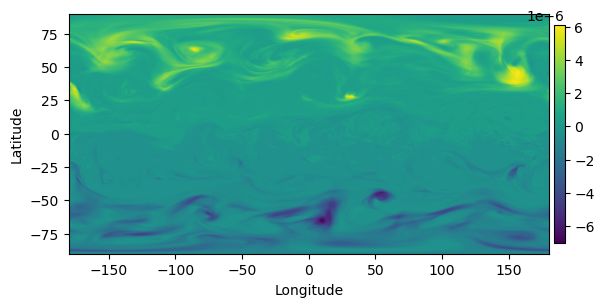

In [156]:
plot_variable_at_level('pv', 350)

Next, lets create a function that can plot a single day of data at a given level for a given variable.

In [187]:
def plot_time(variable, starting_time, level):
    variable_data = center_at_prime_meridean(dataset.sel(level=level, time=starting_time)[variable].values)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    im = plt.imshow(variable_data, extent=[-180,180,-90,90])
    plt.colorbar(im, fraction=0.022, pad=0.01)

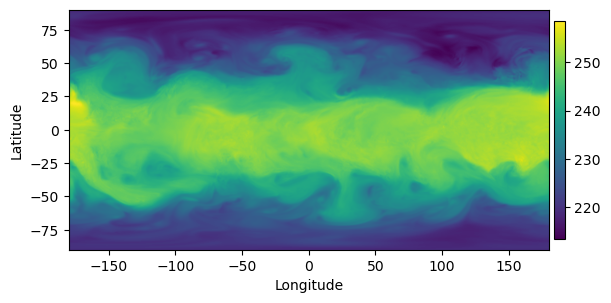

In [188]:
plot_time('t', starting_time + datetime.timedelta(hours=1), 350)

Next, lets plot it over a time period!

In [278]:
def plot_time_intervals(variable, starting_time, level, intervals=6, columns=2, rows=3):
    columns = int(intervals / rows)
    fig = plt.figure(figsize=(15, 15))
    delta = datetime.timedelta(hours=1)

    for i in range(1, columns*rows + 1):
        time_slice = starting_time + delta * (i - 1)
        variable_data = center_at_prime_meridean(dataset.sel(level=level, time=time_slice)[variable].values)
        fig.add_subplot(rows, columns, i, title=time_slice)
        im = plt.imshow(variable_data, extent=[-180,180,-90,90])
        plt.colorbar(im, fraction=0.022, pad=0.01)

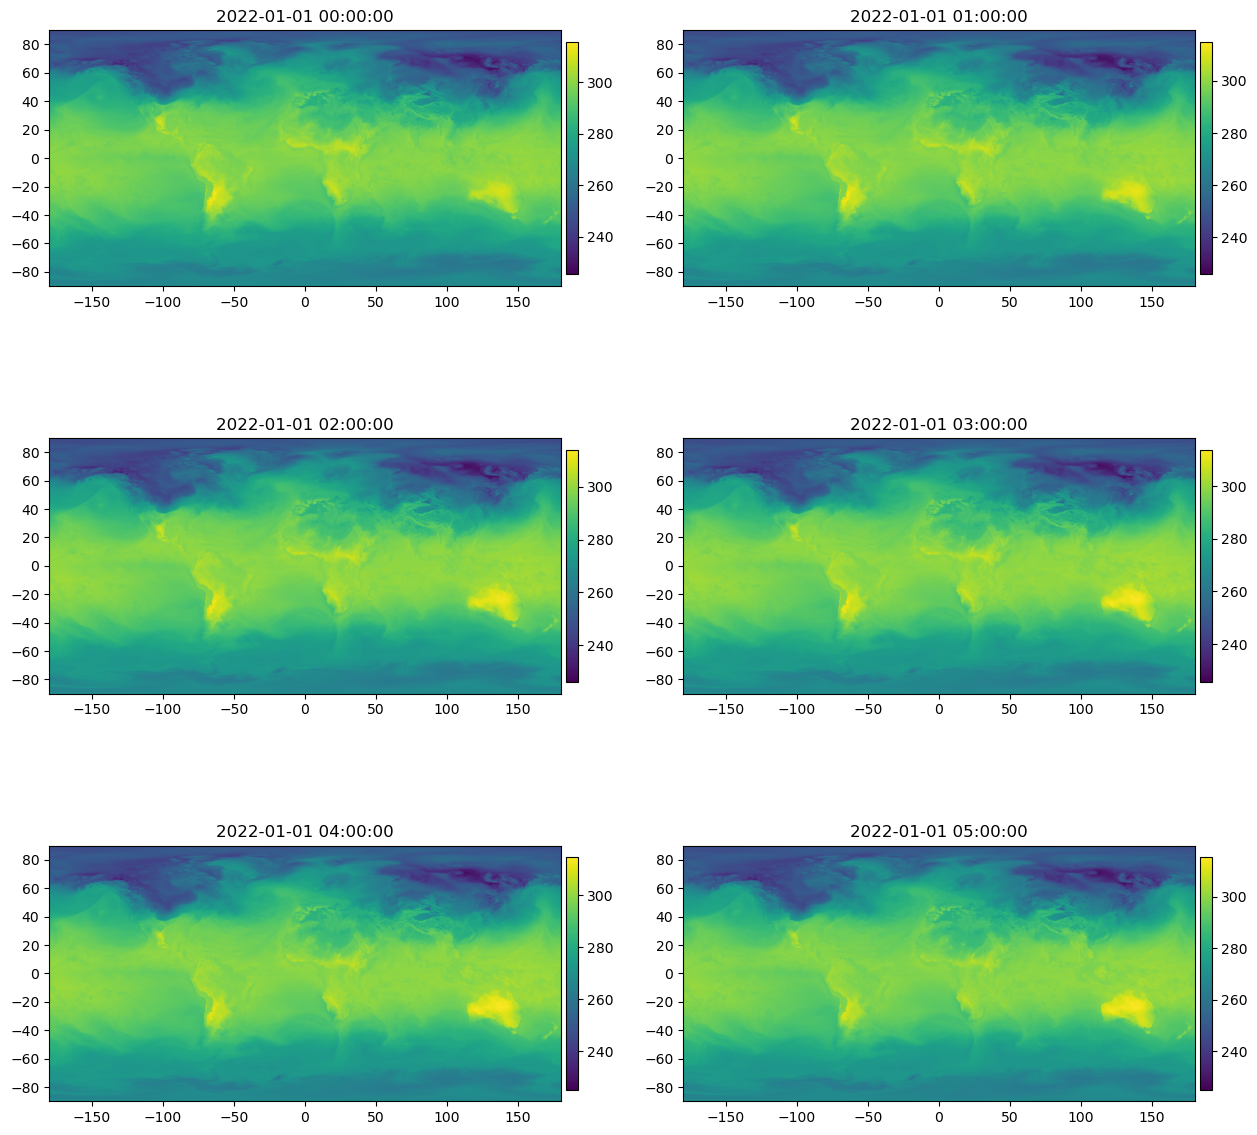

In [279]:
# note that adding intervals will make the images smaller and harder to view
plot_time_intervals('t', starting_time, 1000, intervals=6)

Lets create a function to view the images, cropped to see more details. Below is the temperature of western side of Africa magnified.

In [51]:
def plot_time_cropped(variable, starting_time, level, b, t, l, r):
    new_b = int(360 + 360 * (b/90))
    new_t = int(360 + 360 * (t/90))
    new_l = int(1440 * (l / 360))
    new_r = int(1440 * (r/ 360))
    variable_data = center_at_prime_meridean(dataset.sel(level=level, time=starting_time)[variable].values[new_b:new_t, new_l:new_r])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    im = plt.imshow(variable_data, extent=[l, r, b, t])
    plt.colorbar(im, fraction=0.022, pad=0.01)

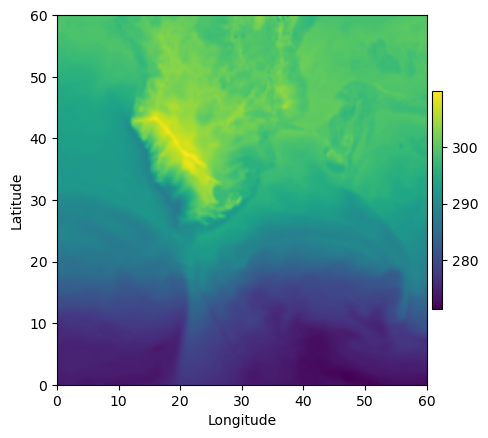

In [281]:
plot_time_cropped('t', starting_time, 1000, 0, 60, 0, 60)

Lets plot it over time + cropped! As seen below, the geopotential (z) changes throughout the day, noticeably.

In [316]:
def plot_time_cropped_intervals(variable, starting_time, level, b, t, l, r, intervals=6, columns=3, rows=2, delta=1):
    new_b = int(360 + 360 * (b/90))
    new_t = int(360 + 360 * (t/90))
    new_l = int(1440 * (l / 360))
    new_r = int(1440 * (r/ 360))
    columns = int(intervals / rows)
    fig = plt.figure(figsize=(15, 15))
    delta = datetime.timedelta(hours=delta)

    for i in range(1, columns*rows + 1):
        time_slice = starting_time + delta * (i - 1)
        variable_data = center_at_prime_meridean(dataset.sel(level=level, time=time_slice)[variable].values[new_b:new_t, new_l:new_r])
        fig.add_subplot(rows, columns, i, title=time_slice)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        im = plt.imshow(variable_data, extent=[l, r, b, t])
    plt.colorbar(im, ax=np.array(fig.axes).ravel().tolist(), fraction=0.022, pad=0.03)

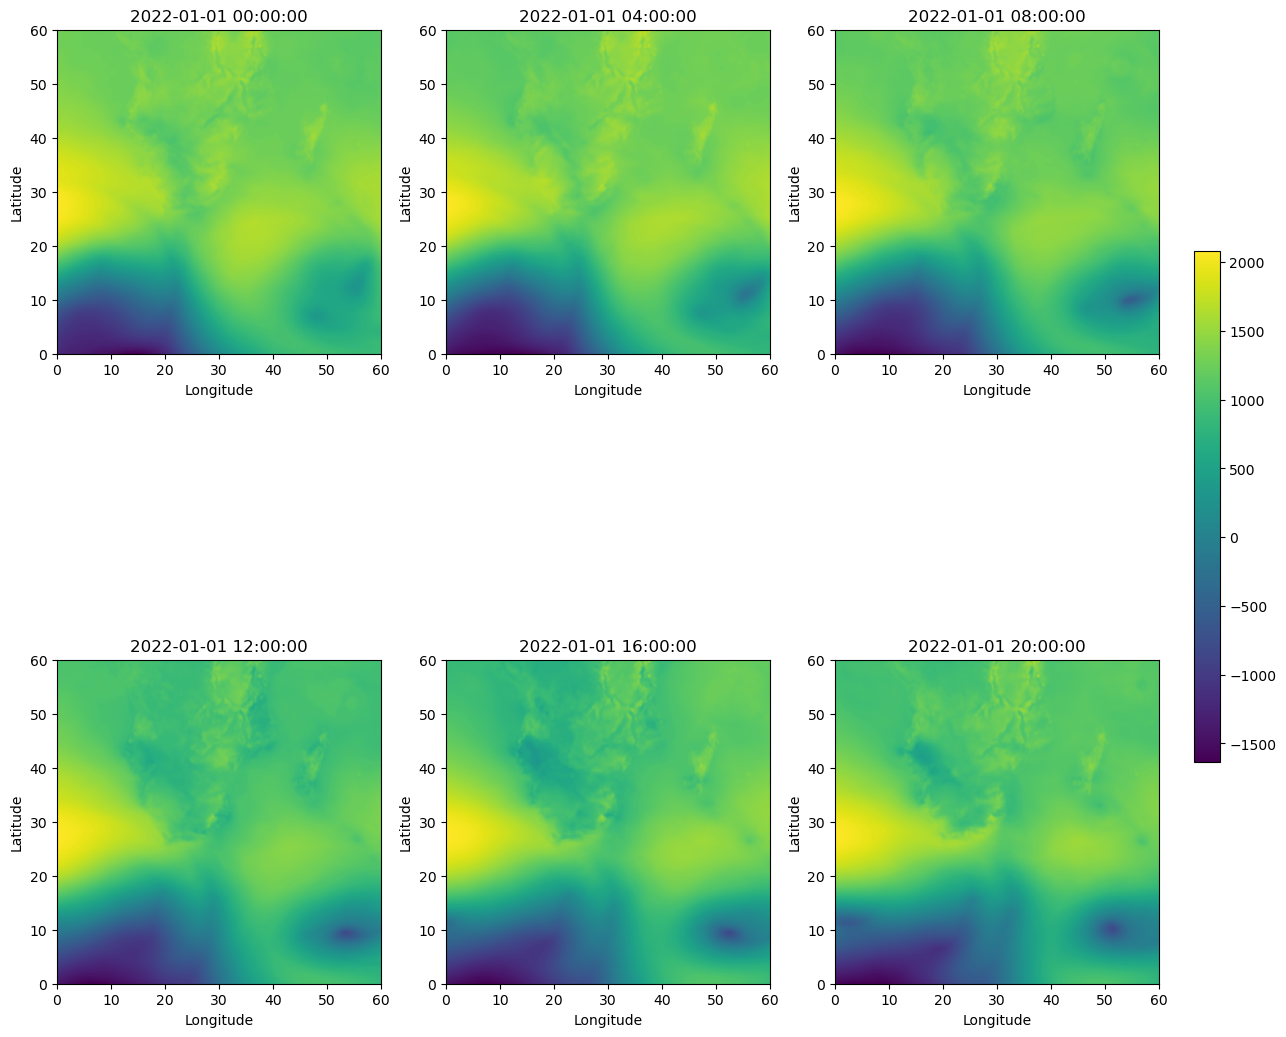

In [317]:
plot_time_cropped_intervals('z', starting_time, 1000, 0, 60, 0, 60, delta=4)

Last but not least, lets visualize the data over an actual map so we can get a sense of location/relativity.

In [25]:
import matplotlib.pyplot as plt

In [26]:
def plot_over_map(level, variable, starting_time):
    overlay = plt.imread('./world_scaled_for_lat_long.png')[145:455, 99:721]
    variable_data = center_at_prime_meridean(dataset.sel(level=level, time=starting_time)[variable].values)

    plt.imshow(overlay, extent=[-180,180,-90,90])
    plt.imshow(variable_data, extent=[-180,180,-90,90], alpha=0.8)

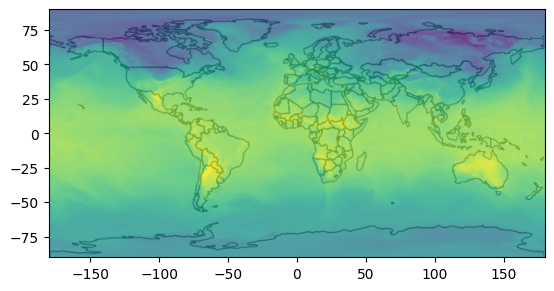

In [27]:
plot_over_map(1000, 't', starting_time)

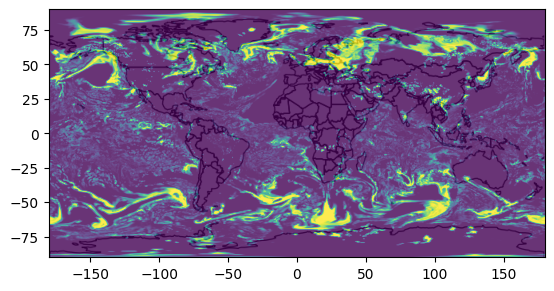

In [33]:
plot_over_map(900, 'cc', starting_time)

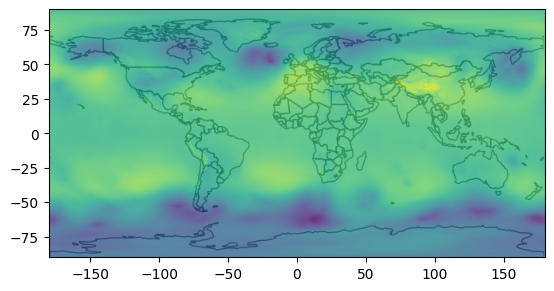

In [34]:
plot_over_map(900, 'z', starting_time)

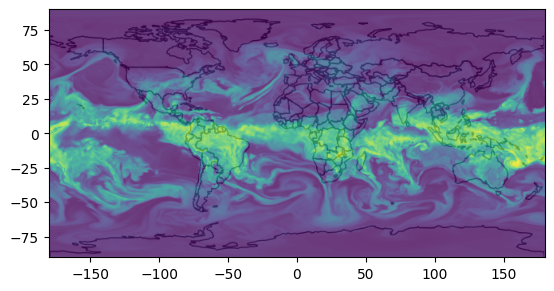

In [48]:
plot_over_map(750, 'q', starting_time)

Feel free to play with the visualizations to get a better understanding of how the data may influence the model.